In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter
import re
import os
import json

In [4]:
def create_all_boards_df(folder):
    boards = []
    for filename in os.listdir(folder):
        if filename.endswith('.csv'):
            full_path = os.path.join(folder, filename)
            board = re.split(r'[_/]', full_path)[2]
            df_board = pd.read_csv(full_path)
            df_board['board'] = board
            boards.append(df_board)

    # Final combined DataFrame
    return pd.concat(boards, ignore_index=True)

combined_df = create_all_boards_df('extracted/csv')
combined_df

,thread_id,post_id,reason,timestamp,text,matched_keywords,board
0,4997763,4997763,Matched Parent,2025-06-05 11:49,NaN,NaN,animals & nature
1,4997763,5001612,Matched,2025-06-14 16:31,>>5001585 >>5001598 gay **ai-generated** slop....,NaN,animals & nature
2,4403117,4403117,Matched Parent,2025-04-02 12:01,I found the Crown of OP in the gutter and pick...,NaN,anime
3,4403117,4414811,Matched,2025-06-21 03:59,>>4414737 >tfw using all the **ai tools** at m...,NaN,anime
4,4413212,4413212,Matched,2025-06-08 16:34,a comfy thread for celebrating the most beauti...,NaN,anime
...,...,...,...,...,...,...,...
289,105984874,105991663,Matched,2025-07-22 20:27,>>105991648 >at worse **ai-generated** art fal...,NaN,technology
290,105917285,105917285,Matched Parent,2025-07-15 18:31,"<span class=""quote"">&gt;Lisp is a family of pr...",NaN,technology
291,105917285,105922681,Matched,2025-07-16 05:08,">>105917285 do aider, gptel, and other **ai as...",NaN,technology
292,23391434,23391434,Matched Parent,2025-07-18 03:40,What’s your favourite shin movie so far?,NaN,mecha


In [5]:
combined_df.loc[combined_df['reason'] == 'Matched', 'matched_keywords'] = combined_df.loc[combined_df['reason'] == 'Matched', 'text'].str.extract(r'\*\*(.*?)\*\*', expand=False)
combined_df

/var/folders/p6/7rqrp6w17vl0ny3w4x6480br0000gn/T/ipykernel_78470/1683696909.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['ai-generated' 'ai tools' 'ai-generated' 'ai-generated' 'deepfake'
 'ai-generated' 'ai-generated' 'ai-generated' 'ai-generated'
 'ai-generated' 'ai-generated' 'ai tools' 'deepfake' 'deepfake'
 'ai-generated' 'ai tools' 'ai-generated' 'ai-generated' 'ai-generated'
 'deepfake' 'ai-generated' 'deepfake' 'godmode' 'ai-generated'
 'ai-generated' 'ai-generated' 'ai tools' 'deepfake' 'ai tools'
 'ai-generated' 'ai-generated' 'ai-generated' 'ai tools' 'face swap'
 'spam bot' 'spam bot' 'face swap' 'ai ' 'ai tools' 'spam bot' 'deepfake'
 'ai assistants' 'ai-generated' 'ai coding tools' 'ai tools' 'deepfake'
 'deepfake' 'deepfake' 'deepfake'
 '"7h3 l4w 15 w17h1n y0u. 4nd y0u 4r3 b3y0nd l4w."' 'ai fraud' 'ai tools'
 'ai-generated' 'ai tools' 'ai-generated' 'ai-generated' 'ai tools'
 'ai t

,thread_id,post_id,reason,timestamp,text,matched_keywords,board
0,4997763,4997763,Matched Parent,2025-06-05 11:49,NaN,NaN,animals & nature
1,4997763,5001612,Matched,2025-06-14 16:31,>>5001585 >>5001598 gay **ai-generated** slop....,ai-generated,animals & nature
2,4403117,4403117,Matched Parent,2025-04-02 12:01,I found the Crown of OP in the gutter and pick...,NaN,anime
3,4403117,4414811,Matched,2025-06-21 03:59,>>4414737 >tfw using all the **ai tools** at m...,ai tools,anime
4,4413212,4413212,Matched,2025-06-08 16:34,a comfy thread for celebrating the most beauti...,ai-generated,anime
...,...,...,...,...,...,...,...
289,105984874,105991663,Matched,2025-07-22 20:27,>>105991648 >at worse **ai-generated** art fal...,ai-generated,technology
290,105917285,105917285,Matched Parent,2025-07-15 18:31,"<span class=""quote"">&gt;Lisp is a family of pr...",NaN,technology
291,105917285,105922681,Matched,2025-07-16 05:08,">>105917285 do aider, gptel, and other **ai as...",ai assistants,technology
292,23391434,23391434,Matched Parent,2025-07-18 03:40,What’s your favourite shin movie so far?,NaN,mecha


# quantity of AI TOOLS MENTION

In [8]:

most_occured_keywords = combined_df['matched_keywords'].value_counts()
most_occured_keywords

matched_keywords
ai-generated                                        69
deepfake                                            34
ai tools                                            21
spam bot                                             9
godmode                                              7
fake video                                           6
face swap                                            3
ai assistants                                        3
fake audio                                           2
ai exploit                                           2
ai                                                   1
ai coding tools                                      1
"7h3 l4w 15 w17h1n y0u. 4nd y0u 4r3 b3y0nd l4w."     1
ai fraud                                             1
ai nudes                                             1
Name: count, dtype: int64

Text(0.5, 1.0, 'Most Mentioned AI Keywords in 4Chan')

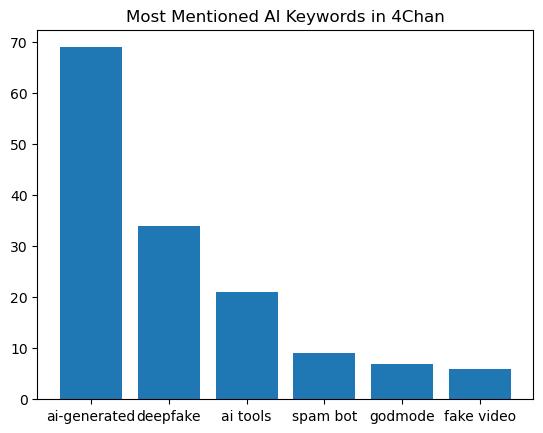

In [7]:
most_occured_keywords = combined_df['matched_keywords'].value_counts()[:6]
plt.bar(most_occured_keywords.index, most_occured_keywords.values)
plt.title('Most Mentioned AI Keywords in 4Chan')

**"AI Tools" and "AI-generated" keywords need further analysis**

# Analyzing threads with the most mentioned ai tools

In [10]:
threads_with_ai_list = []
for kw in ['ai-generated', 'ai tools', 'deepfake','spam bot','godmode']:
    mask = combined_df['matched_keywords'] == kw
    thread_counts = combined_df[mask]['thread_id'].value_counts().head(4)
    threads_with_ai_list.append(thread_counts.index.tolist())

threads_with_ai_list = [tid for group in threads_with_ai_list for tid in group]

threads_with_ai_list

[8663849,
 105984874,
 42353451,
 532231194,
 105984896,
 459830,
 16717506,
 60674177,
 12421995,
 34112219,
 7649562,
 34132324,
 937444862,
 1013968,
 531280693,
 8652445,
 11880612,
 531615448,
 1835686,
 22953251]

*Analyzing those threads*

preprocess  boards for analysis

In [11]:
all_dfs = []

# Loop through all _filtered.json files
for filename in os.listdir('filtered_boards'):
    if filename.endswith('_filtered.json'):
        path = os.path.join('filtered_boards', filename)

        with open(path, 'r') as f:
            data = json.load(f)

        # Convert list of posts to DataFrame
        df = pd.DataFrame(data)

        # Add board name from filename
        board = filename.replace('_filtered.json', '')
        df['board'] = board

        all_dfs.append(df)

# Combine all boards into one DataFrame
combined_df_threads = pd.concat(all_dfs, ignore_index=True)

In [14]:
flattened_rows = []

for _, row in combined_df_threads.iterrows():
    posts = row['posts']
    keywords = row['matched_keywords']
    board = row['board']

    for post in posts:
        # Optional safety check
        if isinstance(post, dict):
            if post.get('resto') != 0:
                flattened_rows.append({
                    'thread_id': post.get('resto'),
                    'post_id': post.get('no'),
                    'timestamp': post.get('now'),
                    'text': post.get('com'),  # HTML-formatted text
                    'matched_keywords': keywords,
                    'board': board
                })
            else:
                flattened_rows.append({
                    'thread_id': post.get('no'),
                    'post_id': post.get('no'),
                    'timestamp': post.get('now'),
                    'text': post.get('com'),  # HTML-formatted text
                    'matched_keywords': keywords,
                    'board': board
                })

# Convert to new flat DataFrame
flat_df = pd.DataFrame(flattened_rows)

threads_with_ai_df = flat_df[flat_df['thread_id'].isin(threads_with_ai_list)].reset_index(drop = True)
threads_with_ai_df


,thread_id,post_id,timestamp,text,matched_keywords,board
0,12421995,12421995,07/21/25(Mon)21:21:04,Going to force feed this Arab bitch bacon whil...,[deepfake],s4s
1,12421995,12422006,07/21/25(Mon)21:24:37,"<a href=""#p12421995"" class=""quotelink"">&gt;&gt...",[deepfake],s4s
2,12421995,12422051,07/21/25(Mon)21:42:42,This is the worst image ever created,[deepfake],s4s
3,12421995,12422072,07/21/25(Mon)21:48:33,None,[deepfake],s4s
4,12421995,12422078,07/21/25(Mon)21:49:38,"<a href=""#p12421995"" class=""quotelink"">&gt;&gt...",[deepfake],s4s
...,...,...,...,...,...,...
5616,8652445,8668032,07/22/25(Tue)15:42:08,Miku,[spam bot],h
5617,8652445,8668033,07/22/25(Tue)15:46:18,"<a href=""#p8667869"" class=""quotelink"">&gt;&gt;...",[spam bot],h
5618,8652445,8668043,07/22/25(Tue)16:01:59,soft tits look better,[spam bot],h
5619,8652445,8668047,07/22/25(Tue)16:05:53,"<a href=""#p8668043"" class=""quotelink"">&gt;&gt;...",[spam bot],h


In [17]:
threads_with_ai_df['text'] = threads_with_ai_df['text'].apply(lambda x: re.sub(r"&#039;|<.*?>", "", x).strip() if pd.notnull(x) else x)
threads_with_ai_df

,thread_id,post_id,timestamp,text,matched_keywords,board
0,12421995,12421995,07/21/25(Mon)21:21:04,Going to force feed this Arab bitch bacon whil...,[deepfake],s4s
1,12421995,12422006,07/21/25(Mon)21:24:37,&gt;&gt;12421995Built for BJC (big jew cock),[deepfake],s4s
2,12421995,12422051,07/21/25(Mon)21:42:42,This is the worst image ever created,[deepfake],s4s
3,12421995,12422072,07/21/25(Mon)21:48:33,None,[deepfake],s4s
4,12421995,12422078,07/21/25(Mon)21:49:38,&gt;&gt;12421995why did she do that?,[deepfake],s4s
...,...,...,...,...,...,...
5616,8652445,8668032,07/22/25(Tue)15:42:08,Miku,[spam bot],h
5617,8652445,8668033,07/22/25(Tue)15:46:18,"&gt;&gt;8667869Yeah, I do, most of mine are ~6...",[spam bot],h
5618,8652445,8668043,07/22/25(Tue)16:01:59,soft tits look better,[spam bot],h
5619,8652445,8668047,07/22/25(Tue)16:05:53,"&gt;&gt;8668043For bigger boobs, sure.",[spam bot],h


What are the main themes of those threads?

What are the mentioned tools of those threads? 

In [18]:
themes = {
    "ai tools": [
        "wormgpt", "fraudgpt", "darkbert", "blackhatgpt", "evilgpt", 
        "godmode", "deepnude", "pornogpt", "deepagent", "hackgpt"
    ],
    "ai-assisted hacking": [
        "prompt injection", "automated exploit", "ai malware",
        "phishing", "reconnaissance", "autonomous hacking agent"
    ],
    "ai social engineering": [
        "voice clone", " voice", "ai-generated video", "romance scam",
        "deepfake scam", "face swap", "synthetic identity", "impersonation"
    ],
    "ai fraud services": [
        "captcha solver", "account generator", "credential stuffing", 
        "click fraud", "ai ad fraud", "scam bot"
    ],
    "ai media manipulation": [
        "deepfake", "manipulated media", "image generator", "midjourney", 
        "stablediffusion", "photoshop", "propaganda"
    ]
}

# ===== THEME EXTRACTION =====
def extract_main_theme(text):
    text_lower = text.lower()
    scores = {}
    first_match_pos = {}

    for theme, words in themes.items():
        matches = []
        for word in words:
            pattern = r"\b" + re.escape(word.lower()) + r"\b"
            found = [m.start() for m in re.finditer(pattern, text_lower)]
            if found:
                matches.extend(found)

        if matches:
            scores[theme] = len(matches) / len(words)
            first_match_pos[theme] = min(matches)
        else:
            scores[theme] = 0
            first_match_pos[theme] = float('inf')

    max_score = max(scores.values(), default=0)
    if max_score == 0:
        return "unknown", 0

    tied_themes = [theme for theme, score in scores.items() if score == max_score]
    if len(tied_themes) > 1:
        chosen_theme = min(tied_themes, key=lambda t: first_match_pos[t])
    else:
        chosen_theme = tied_themes[0]

    return chosen_theme, round(max_score, 2)




In [19]:
tool_reference = {
    "wormgpt": ("malicious LLM", "GPT variant used for fraud & phishing"),
    "fraudgpt": ("malicious LLM", "AI model for cyber fraud and scams"),
    "godmode": ("malicious LLM", "Exploitation-focused AI assistant"),
    "darkbert": ("malicious LLM", "BERT variant trained on dark web data"),
    "blackmamba": ("malware", "AI-generated polymorphic malware"),
    "evilgpt": ("malicious LLM", "GPT variant for malicious purposes"),
    "darkgpt": ("malicious LLM", "GPT variant with uncensored outputs"),
    "hackgpt": ("malicious LLM", "AI model for hacking assistance"),
    "deepnude": ("image manipulation", "Generates fake explicit images"),
    "deepfake": ("video manipulation", "Generates fake videos or impersonations"),
    "midjourney": ("image generation", "AI art & content creation tool"),
    "stablediffusion": ("image generation", "AI image generator"),
    "d-id": ("video manipulation", "AI talking head generator"),
    "faceapp": ("image manipulation", "Face editing and transformation app"),
    "faceswap": ("image manipulation", "AI-based face replacement tool"),
    "replika": ("chatbot", "AI companionship chatbot"),
    "character.ai": ("chatbot", "Custom roleplay/chat AI"),
    "chatgpt": ("LLM", "General purpose AI chatbot by OpenAI"),
    "claude": ("LLM", "Anthropic's AI assistant"),
    "groq": ("infrastructure", "AI inference hardware"),
    "gpt-4": ("LLM", "OpenAI's GPT-4 model"),
    "gpt-3": ("LLM", "OpenAI's GPT-3 model"),
    "copilot": ("code assistant", "GitHub/OpenAI code assistant"),
    "suno": ("audio generation", "AI music creation tool"),
    "elevenlabs": ("audio generation", "AI voice cloning and TTS"),
    "voicemy.ai": ("audio generation", "Voice generation platform"),
    "uberduck": ("audio generation", "Custom voice generator"),
    "respeecher": ("audio generation", "Voice cloning service"),
    "openai": ("organization", "Developer of GPT models"),
    "anthropic": ("organization", "Developer of Claude AI"),
    "llama": ("LLM", "Meta's large language model"),
    "mistral": ("LLM", "Open-source LLM provider"),
    "falcon": ("LLM", "High-performance open-source LLM"),
    "grok": ("LLM", "X/Twitter's AI chatbot"),
    "bard": ("LLM", "Google's conversational AI"),
    "gemini": ("LLM", "Google's upgraded Bard AI"),
    "xrumer": ("spam bot", "Forum and blog spam automation"),
    "gsa search engine ranker": ("spam bot", "Automated SEO link building tool"),
    "senuke": ("spam bot", "SEO automation suite"),
    "jarvee": ("spam bot", "Social media automation"),
    "massplanner": ("spam bot", "Social media growth bot")
}



tool_patterns = [(tool, re.compile(rf'\b{re.escape(tool)}\b', re.IGNORECASE)) for tool in tool_reference.keys()]

def extract_tools(text):
    found_tools = []
    for tool, pattern in tool_patterns:
        if pattern.search(text):
            value = tool_reference[tool]
            if isinstance(value, tuple) and len(value) == 2:
                category, description = value
            else:
                category, description = value, None  # fallback
            found_tools.append({
                "tool": tool,
                "category": category,
                "description": description
            })
    return found_tools if found_tools else None


In [20]:
def analyze_threads(df):
    thread_summaries = []

    for thread_id, group in df.groupby("thread_id"):
        full_text = " ".join(str(t) for t in group["text"] if pd.notna(t))

        theme, confidence = extract_main_theme(full_text)
        tools = extract_tools(full_text)

        keywords = []
        for kws in group["matched_keywords"]:
            if isinstance(kws, list):
                keywords.extend(kws)
            elif isinstance(kws, str):
                keywords.append(kws)

        thread_summaries.append({
            "thread_id": thread_id,
            "board": group["board"].iloc[0],
            "keyword(s)": list(set(keywords)),
            "main_theme": theme,
            "theme_confidence": confidence,
            "tools_or_techniques": tools,
            "post_count": len(group)
        })

    return pd.DataFrame(thread_summaries)

result_df = analyze_threads(threads_with_ai_df)
strong_themes_df = result_df[result_df['theme_confidence'] > 0.2]
strong_themes_df

,thread_id,board,keyword(s),main_theme,theme_confidence,tools_or_techniques,post_count
0,459830,gd,[ai tools],ai media manipulation,0.29,None,13
3,7649562,ic,"[deepfake, ai-generated]",ai media manipulation,0.57,"[{'tool': 'deepfake', 'category': 'video manip...",182
4,8652445,h,[spam bot],ai media manipulation,0.29,None,465
5,8663849,h,[ai-generated],ai media manipulation,0.29,"[{'tool': 'stablediffusion', 'category': 'imag...",1194
7,12421995,s4s,[deepfake],ai media manipulation,0.29,"[{'tool': 'deepfake', 'category': 'video manip...",74
9,22953251,bant,"[godmode, ai tools]",ai media manipulation,0.71,"[{'tool': 'godmode', 'category': 'malicious LL...",169
10,34112219,soc,[deepfake],ai media manipulation,0.57,"[{'tool': 'deepfake', 'category': 'video manip...",61
11,34132324,soc,[deepfake],ai social engineering,0.88,"[{'tool': 'deepfake', 'category': 'video manip...",450
12,42353451,mlp,[ai-generated],ai media manipulation,0.43,"[{'tool': 'stablediffusion', 'category': 'imag...",275
14,105984874,g,[ai-generated],ai media manipulation,0.43,None,348


In [25]:
dict = {}
for kw in tool_reference:
    count = threads_with_ai_df['text'].str.contains(rf"\b{re.escape(kw)}\b", case=False, na=False).sum()
    dict[kw] = count
dict
    

{'wormgpt': 0,
 'fraudgpt': 0,
 'godmode': 4,
 'darkbert': 0,
 'blackmamba': 0,
 'evilgpt': 0,
 'darkgpt': 0,
 'hackgpt': 0,
 'deepnude': 0,
 'deepfake': 10,
 'midjourney': 1,
 'stablediffusion': 3,
 'd-id': 0,
 'faceapp': 0,
 'faceswap': 1,
 'replika': 0,
 'character.ai': 0,
 'chatgpt': 7,
 'claude': 5,
 'groq': 0,
 'gpt-4': 0,
 'gpt-3': 0,
 'copilot': 0,
 'suno': 8,
 'elevenlabs': 0,
 'voicemy.ai': 0,
 'uberduck': 0,
 'respeecher': 0,
 'openai': 6,
 'anthropic': 2,
 'llama': 0,
 'mistral': 0,
 'falcon': 1,
 'grok': 5,
 'bard': 0,
 'gemini': 13,
 'xrumer': 0,
 'gsa search engine ranker': 0,
 'senuke': 0,
 'jarvee': 0,
 'massplanner': 0}

In [24]:
for theme, kws in themes.items():
    theme_count = sum(
        threads_with_ai_df['text'].str.contains(rf"\b{re.escape(kw)}\b", case=False, na=False).any()
        for kw in kws
    )
    print(f"{theme}: {theme_count}")

ai tools: 1
ai-assisted hacking: 0
ai social engineering: 1
ai fraud services: 0
ai media manipulation: 6


In [21]:
path = '4Chan_keywords_analysis_results.csv'
if os.path.exists(path):
    print('Already exists')
else:
    strong_themes_df.to_csv(path, index = False)

Already exists


In [1]:
keywords = [
    "chatgpt", "suno", "midjourney", "claude", "phishing", "prompt", "exploit", "telegram", "discord",
    "Ada", "Adobe Firefly", "Anychat", "Ash", "Attestiv", "Augi", "Azure OpenAI Service", "Bing Image Generator",
    "Capcut", "Claude", "Codeium", "Cora", "Cubby", "Curio", "Cursor", "D-ID", "DeepSeek AI", "DeepSeek R1",
    "Delphi", "ElevenLabs", "FaceApp", "Gamma", "Gemma 3", "GitHub Copilot", "Good Inside", "Google Gemini",
    "Granola", "Grok", "Grok-3", "HeyGen", "Ideogram", "Jasper AI", "Kling", "Krea", "Lindy", "Manus",
    "Meixiaosan", "Meta Imagine", "Murf.ai", "NotebookLM", "OpenAI's Deep Research", "Overlap", "Particle News",
    "Pentestgpt.com", "Perplexity AI", "Persona", "Photoroom", "Playground", "QwQ-32B", "Remix", "Replit",
    "Rosebud", "Runway Gen-2", "Scribbr AI", "Synthesia", "Unscript AI", "Viggle", "WeVideo, Inc.", "Whisper Flow","godmode", 
]

# Escape double quotes in any keywords
keywords = [kw.replace('"', '""') for kw in keywords]

formula_parts = [f'ISNUMBER(SEARCH("{kw}",$A1))' for kw in keywords]
excel_formula = f"=OR({','.join(formula_parts)})"

print("Copy this formula into Excel Conditional Formatting:\n")
print(excel_formula)


Copy this formula into Excel Conditional Formatting:

=OR(ISNUMBER(SEARCH("chatgpt",$A1)),ISNUMBER(SEARCH("suno",$A1)),ISNUMBER(SEARCH("midjourney",$A1)),ISNUMBER(SEARCH("claude",$A1)),ISNUMBER(SEARCH("phishing",$A1)),ISNUMBER(SEARCH("prompt",$A1)),ISNUMBER(SEARCH("exploit",$A1)),ISNUMBER(SEARCH("telegram",$A1)),ISNUMBER(SEARCH("discord",$A1)),ISNUMBER(SEARCH("Ada",$A1)),ISNUMBER(SEARCH("Adobe Firefly",$A1)),ISNUMBER(SEARCH("Anychat",$A1)),ISNUMBER(SEARCH("Ash",$A1)),ISNUMBER(SEARCH("Attestiv",$A1)),ISNUMBER(SEARCH("Augi",$A1)),ISNUMBER(SEARCH("Azure OpenAI Service",$A1)),ISNUMBER(SEARCH("Bing Image Generator",$A1)),ISNUMBER(SEARCH("Capcut",$A1)),ISNUMBER(SEARCH("Claude",$A1)),ISNUMBER(SEARCH("Codeium",$A1)),ISNUMBER(SEARCH("Cora",$A1)),ISNUMBER(SEARCH("Cubby",$A1)),ISNUMBER(SEARCH("Curio",$A1)),ISNUMBER(SEARCH("Cursor",$A1)),ISNUMBER(SEARCH("D-ID",$A1)),ISNUMBER(SEARCH("DeepSeek AI",$A1)),ISNUMBER(SEARCH("DeepSeek R1",$A1)),ISNUMBER(SEARCH("Delphi",$A1)),ISNUMBER(SEARCH("ElevenLabs",$